# Algorithmic Machine Learning assignment
due date: 27.05.2016 <br>
student: Adrian Simon Bauer

## Excercise 1:

In [1]:
import numpy as np
import pandas as pd

# read the datafiles
redWine = pd.read_csv('data/winequality-red.csv', sep=';', header=0)
whiteWine = pd.read_csv('data/winequality-white.csv', sep=';', header=0)

## TODO: check for NA-data

In [2]:
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


## Excercise 2: Histogram of the wine quality

In [4]:
histogramRed = redWine.groupby('quality').size()
histogramWhite = whiteWine.groupby('quality').size()

/home/adrian/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/adrian/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


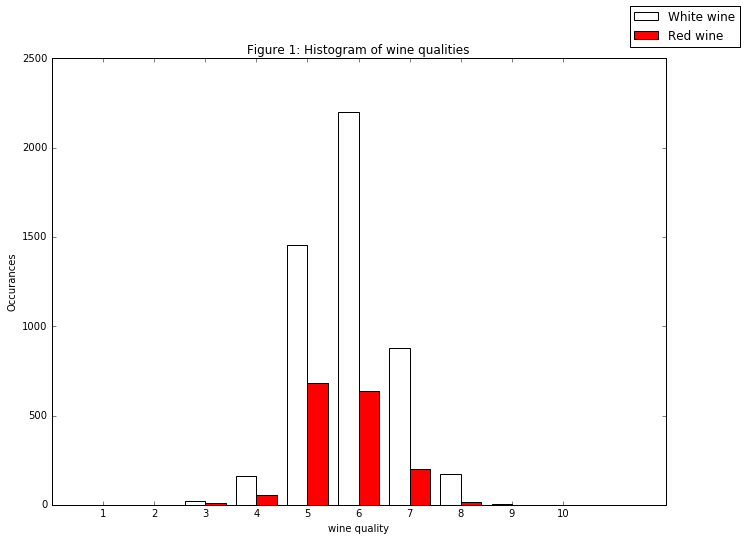

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


figWidth = 11
fig = plt.figure(figsize=(figWidth,8))

redKeys = list(histogramRed.keys())
whiteKeys = list(histogramWhite.keys())

redValues = np.zeros(10)
whiteValues = np.zeros(10)

## the code below can be used for normalization of the values
#sumRedWine = sum(histogramRed)
#sumWhiteWine = sum(histogramWhite)

for key in redKeys:
    redValues[key-1] = histogramRed[key]# / sumRedWine
for key in whiteKeys:
    whiteValues[key-1] = histogramWhite[key]# / sumWhiteWine

ind = np.arange(1, 11)                # the x locations for the groups
width = 0.4

white = plt.bar(ind-width, whiteValues, width,
                color='white')

red = plt.bar(ind, redValues, width,
                    color='red')

# axes and labels
plt.ylabel('Occurances')
plt.xlabel('wine quality')
plt.title('Figure 1: Histogram of wine qualities')
xTickMarks = ind
xtickNames = plt.xticks(xTickMarks)

## add a legend
fig.legend( (white[0], red[0]), ('White wine', 'Red wine') )

plt.show()

## Excercise 3
When we look at this figure, we can clearly observe, that we have a higher number of samples for the white wine than for the red wine. So we can assume that we will be able to observe more precise results for the white wines as the 'noise' on our measurements won't influence the analysis as much as it does on the red wine.
<br> Also we can see, that the most wines have a qualitu in the range from 5-7 while there are very few wines, that have a quality of 3, 4, 8, and 9 and even no whine that has quality 1, 2 or 10. This means, that the linear regression will very likely be biased towards assigning the wines a quality between 5 and 7 as this happens most often.
<br><br> From a first glance it seems that both distributions follow a gaussian distribution with a mean value around 5-6.

## Excercise 4 (linear regression)
### 4.a) create training- and test-data 

In [6]:
# define the proportion
trainingSize = 0.7
testSize = 0.3

# create randomly shuffled list of indexes
indexes = np.arange(len(redWine))
np.random.shuffle(indexes)

# split the indexes into training and test indexes
trainingInd = indexes[:int(trainingSize*len(indexes))]
testInd = indexes[int(trainingSize*len(indexes))+1:]

# split the data accordingly to the indexes
trainRed = redWine.ix[trainingInd,:]
testRed = redWine.ix[testInd,:]
trainRed.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
989,9.7,0.295,0.40,1.5,0.073,14,21,0.99556,3.14,0.51,10.9,6
958,6.4,0.570,0.12,2.3,0.120,25,36,0.99519,3.47,0.71,11.3,7
671,8.2,0.730,0.21,1.7,0.074,5,13,0.99680,3.20,0.52,9.5,5
1464,6.8,0.590,0.10,1.7,0.063,34,53,0.99580,3.41,0.67,9.7,5
1277,7.0,0.690,0.00,1.9,0.114,3,10,0.99636,3.35,0.60,9.7,6


In [7]:
testRed.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
34,5.2,0.32,0.25,1.8,0.103,13,50,0.99570,3.38,0.55,9.2,5
473,9.9,0.35,0.55,2.1,0.062,5,14,0.99710,3.26,0.79,10.6,5
90,7.9,0.52,0.26,1.9,0.079,42,140,0.99640,3.23,0.54,9.5,5
833,11.6,0.47,0.44,1.6,0.147,36,51,0.99836,3.38,0.86,9.9,4
463,8.1,0.66,0.70,2.2,0.098,25,129,0.99720,3.08,0.53,9.0,5


### 4.b) fit linear regression

In [8]:
def featurizeData(data, order=1):
        # add the '1' column to the data
        data['1'] = 1
        return data.as_matrix()

def linearRegression(data, targets, order=1):
    features = featurizeData(data, order)
    targetVec = targets.as_matrix()
    
    weights = np.dot(np.linalg.inv(np.dot(np.transpose(features), features)),np.dot(np.transpose(features),targetVec))
    return weights

In [9]:
w = linearRegression(trainRed.loc[:,:'alcohol'], trainRed.loc[:,'quality'],1)

In [10]:
def predict(data, weights, targets=[]):
    withTargets = len(targets)!= 0
    
    if withTargets:
        targetVec = targets.as_matrix()
    
    result = []
    features = featurizeData(data)
    for ind in range(len(features)):
        predict = np.dot(weights, features[ind,:])
        if withTargets:
            result.append((predict, targetVec[ind]))
        else:
            result.append((predict, none))
    return result

In [11]:
predictions = predict(testRed.loc[:,:'alcohol'], w, testRed.loc[:,'quality'])

### 4.c) make predictions

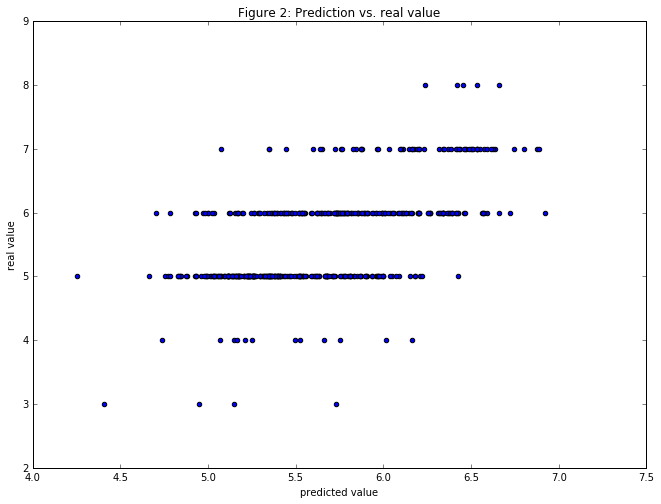

In [12]:
fig = plt.figure(figsize=(11,8))
predVals = np.array(list(map(lambda l: l[0], predictions)))
targetVals = np.array(list(map(lambda l: l[1], predictions)))

plt.scatter(predVals, targetVals)
plt.xlabel('predicted value')
plt.ylabel('real value')
plt.title('Figure 2: Prediction vs. real value')

In [13]:
def computeMeanSquaredError(predictions, targets):
    return ((predictions - targets) **2).mean()

mse = computeMeanSquaredError(predVals, targetVals)
print('The mean squared error is %.4f' %mse)

The mean squared error is 0.4314


### 4.d) Suggest Benchmark
As a very easy benchmark we could suggest to use the most frequent value for prediction. This is comparable to a linear regression of order 0.
<br> Another possible benchmark could be to calculate the Pearson correlation coefficient. This correlation should be 1 for a perfect linear regression.

### 4.e) Implement Benchmark

In [14]:
def benchmarkMFV(targets):
    targetVec = targets.as_matrix()
    predictValue = np.mean(targetVec)
    
    predictions = np.empty_like(targetVec)
    predictions.fill(predictValue)
    
    return computeMeanSquaredError(predictions, targetVec)

benchmarkMFV(testRed.loc[:, 'quality'])

1.0167014613778707

In [15]:
def calculatePearsonCoefficient(predictions, targets):
    assert (len(predictions) == len(targets)), "The dimensions of predictions and targets must fit!"
    
    predMean = np.mean(predictions)
    tarMean = np.mean(targets)
    
    return np.mean((predictions - predMean)*(targets - tarMean)) / (np.std(targets) * np.std(predictions))

calculatePearsonCoefficient(predVals, targetVals)



0.57722654363535975

### 4.f) Discussion of Benchmarks
Both benchmarks show, that our linear regression is on a good way, but it's still not perfect. When compare the mean squared error (MSE) for our predictions with the MSE we achieved by just assigning the most common quality value, we can observe that our MSE is significantly smaller. Still, the MSE is not perfect.
<br> The same goes for the Pearson correlation coefficien that is computed as <br> $\begin{equation} corr(X,Y) = \dfrac{cov(X,Y)}{\sigma_X \cdot \sigma_Y} \end{equation}$ <br>
Our result of a correlation coefficient of .63 shows that the regression model is able to create a correlation between the predicted quality and the real quality. This correlation is moderate but way better than guessing.

## Excercise 5 (Regularized Linear Regression)
### 5.a) Implementation of regularized Linear Regression aka Ridge Regression

In [16]:
def ridgeRegression(data, targets, lambda_, order=1):
    features = featurizeData(data, order)
    targetVec = targets.as_matrix()
    
    weights = np.dot(np.linalg.inv(np.dot(np.transpose(features), features) + (lambda_ * np.identity(len(features[0])) )), \
                     np.dot(np.transpose(features),targetVec))
    return weights

In [17]:
wRidge = ridgeRegression(trainRed.loc[:,:'alcohol'], trainRed.loc[:,'quality'],1)
predictionsRidge = predict(testRed.loc[:,:'alcohol'], wRidge, testRed.loc[:,'quality'])

In [18]:
def mseFromPredictions(predictions):
        predVals = np.array(list(map(lambda l: l[0], predictions)))
        targetVals = np.array(list(map(lambda l: l[1], predictions)))
        return computeMeanSquaredError(predVals, targetVals)

def findGoodLambda(trainData, trainTargets, testData, testTargets, lambdaMin, lambdaMax, stepsize):
    results = []
    
    for value in np.arange(lambdaMin, lambdaMax, stepsize):
        weights = ridgeRegression(trainData, trainTargets, value)
        predictions = predict(testData, weights, testTargets)
        results.append((value, mseFromPredictions(predictions)))
        
    figureWidth = 15    
    fig = plt.figure(figsize=(figureWidth,8))
    indexes = list(map(lambda l: l[0], results))
    values = list(map(lambda l: l[1], results))
    
    minVal = min(values)
    maxVal = max(values)
    
    width = 0.9

    plt.bar(indexes, values, width,
                    color='red')
    plt.ylabel('MSE')
    plt.xlabel('lambda value')
    plt.title('Figure 3: MSE vs lambda')
    xTickMarks = indexes
    xtickNames = plt.xticks(xTickMarks)

    plt.xlim(lambdaMin, lambdaMax)
    plt.ylim(minVal - 0.5 * (maxVal-minVal), maxVal + 0.5 * (maxVal-minVal))
    plt.show()
    
    return results

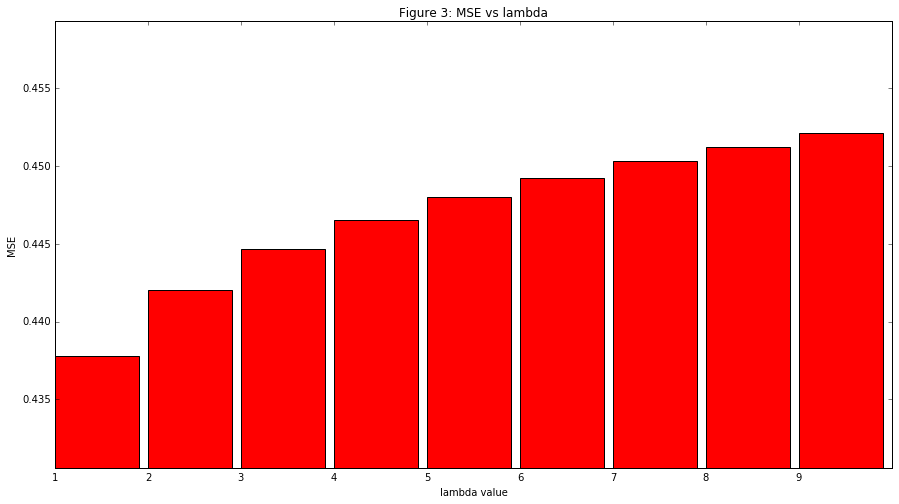

In [19]:
res = findGoodLambda(trainRed.loc[:,:'alcohol'], trainRed.loc[:,'quality'], testRed.loc[:,:'alcohol'],\
               testRed.loc[:,'quality'], 1, 10, 1)

### 5.b) Determining Parameter for Lambda
This is not a good way to determine the lambda-parameter because we optimize the parameter only with regard to one particuliar piece of the dataset. So we run into the problem of overfitting. That means, that it is likely, that the best paramter for this piece of data is not equal to the best parameter for the whole dataset. We might find, that this best parameter for this piece of data fails to generalize when it comes to predicting new data. Also we lose a lot of information by tuning the paramter only based on a small amount of data (in this case 30% of the total dataset) instead of tuning it on the whole dataset.

### 5.c) k-fold crossvalidation   

In [20]:
def kFoldCV(data, targets, k, lambda_):
    
    # create a list of indexes as long as data
    indexes = np.arange(len(data))
    
    # squeeze indexes to interval [0,...,k-1]
    indexes = [ ind % k for ind in indexes]
    
    # shuffle indexes and add them as column to dataframe
    np.random.shuffle(indexes)
    data['cvInd'] = indexes
    
    mse = []
    
    for i in range(k):
        traindata = data[data.cvInd != i].loc[:,:'alcohol']
        trainlabels = targets[data.cvInd != i]
        
        testdata = data[data.cvInd == i].loc[:,:'alcohol']
        testlabels = targets[data.cvInd == i]
        
        weights = ridgeRegression(traindata, trainlabels, lambda_)

        currentMSE = mseFromPredictions(predict(testdata, weights, testlabels))
   
        mse.append(currentMSE)
    
    data = data.drop('cvInd', 1)
    return np.mean(mse)

In [21]:
def findGoodLambdaWithCV(data, k, lambdaMin, lambdaMax, stepsize):
    
    results = []
    for lambda_ in np.arange(lambdaMin, lambdaMax, stepsize):
        results.append((lambda_, kFoldCV(redWine.loc[:,:'alcohol'], redWine.loc[:,'quality'], k, lambda_)) )
   
    figureWidth = 15    
    fig = plt.figure(figsize=(figureWidth,8))
    indexes = list(map(lambda l: l[0], results))
    values = list(map(lambda l: l[1], results))
    
    minVal = min(values)
    maxVal = max(values)
    
    width = 0.9 * stepsize

    plt.bar(indexes, values, width,
                    color='red', align='center')
    plt.ylabel('MSE')
    plt.xlabel('lambda value')
    plt.title('Figure 4: MSE vs lambda')
    xTickMarks = indexes
    xtickNames = plt.xticks(xTickMarks)

    plt.xlim(lambdaMin-width, lambdaMax)
    plt.ylim(minVal - 0.5 * (maxVal-minVal), maxVal + 0.5 * (maxVal-minVal))
    plt.show()
    
    return results

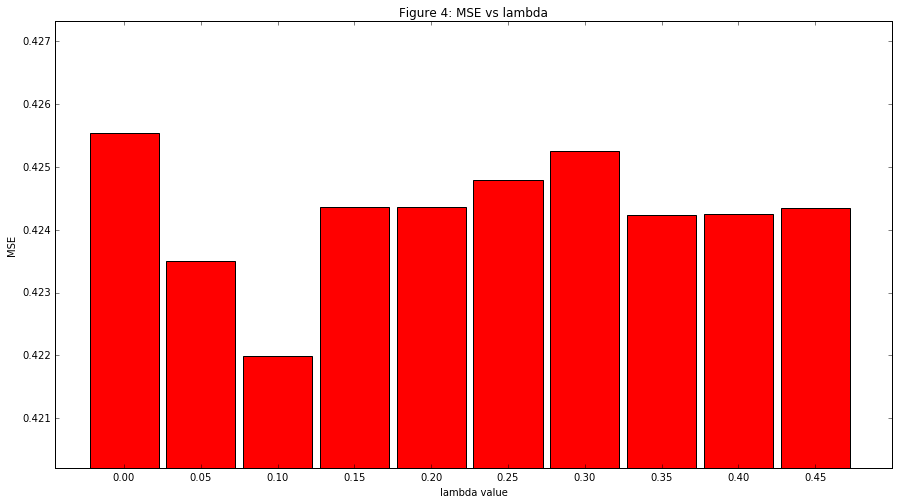

In [22]:
res = findGoodLambdaWithCV(redWine, 10, 0, .5, .05)

In [23]:
def extractBestValue(results):
    minVal = min(results, key=lambda l: l[1])
    print("The minimum mse value was mse = %.3f at lambda = %.2f " %(minVal[1], minVal[0]))
    return

extractBestValue(res)

# TODO: What does he mean by 'Quote the optimal value, and the performance at this value on the test set'

The minimum mse value was mse = 0.422 at lambda = 0.10 


### 5.d) Comparison of Performance
To answer this question we must first talk about the mse-value for the standard linear regression. When calculated in excercise 4.c), the mse was approximately 0.39. However this value was only computed on the test-dataset without the use of any crossvalidation technique. However, when we take a look at figure 4, we see another image. Here the value for lambda = 0 corresponds to a standard linear regression and this value ($\approx 0.426$) is slightly higher than the value computed before. So the first thing to discuss is, why the mse for the standard linear regression is higher, when computed via 10-crossvalidation:<br>
When we use only one part of the dataset for testing the performance of the regression (instead of doing the crossvalidation), we run into a problem: it is possible, that we selected a part of the dataset that behaves extremly (either very well or very bad). This is actually one of the reasons why we use crossvalidation, to average over the whole dataset. So the value of the crossvalidation is much more reliable than the value computed only on the testset and we should furthermore use the values computed with crossvalidation to discuss differences in performance.<br> <br>
So if we take a second look at figure 4. Here we can see the mse for the standard linear regression at $\lambda = 0$. Comparing this value to the minimum mse at $\lambda = 0.2$, we see that with the optimal $\lambda$-value, the sme is slightly better than in the standard case. The small decrease in the sme can be explained as a result of less overfitting. The regularization increases the regressions ability to generalize and therefore results in better predictions.

## Excercise 6 (Classification)
### 6.a) LImitations of Regression
The limitations of the regression are, that we learn based on discrete target-values but our model assumes continuous targets. So we assume some precision in the learning step, that is not true. Assume for example, that a wine's quality is in the middle between 5 and 6, let's say at 5.5, but it got assigned wine quality 6. Now our model assumes that the wine is a straight 6 six and would give us the same error if we assigned the wine a 5.5 or a 6.5. But we can clearly see, that this is not true because in the optimal case, the assignment of 5.5 should give an error of 0, while the assignment of 6.5 should give an error of $0.5^2$.<br> So the model assumes that the training target values are more precise than they are. 

### 6.b) KNN vs. Naive Bayes
I choose to use the naive bayes approach in this part of the excercise. The naive bayes has the big advantage that it is a probabilistic classifier, which means that additionally to the predicted classes it will give us information about how sure it is with its classification. Also if the distribution of the features is well assumed, the different variances of the features are taken into account whileas for the KNN-approach the use of the Mahalanobis-distance or the standardization of the features are used to cope with different magnitudes of variances of the features. <br>
The disadvantage of the naive bayes, compared to the KNN-approach is, that it is much more expensive in terms of computational cost and that it is harder to implement. Also the performance of the naive bayes depends on parameters like the assumed prior class-probability and the probabilty distribution of samples given their class. This parameters are way harder to optimize than only the number k of the KNN which can be optimized easily using k-fold cross validation. Also the naive bayes approach assumes, that the features (or the dimensions of the feature vector) are independent.

### 6.c) Preprocessing of the data
In order of preprocessing the data, it will be helpful to divide the data into the respective classes and to compute mean and covariance matrix for the features of each class. Also the histogram of excercise 2 can be helpful to estimate the prior class-densities.

### 6.d) Implementation and Optimization of Parameters

In [118]:
from collections import namedtuple
# define a struct 'Class' with the variables means, var (variances) and num (number of elements)
Class = namedtuple('Class', 'means var num')

def preprocessing(data):
    "Preprocessing of data for later use in naive Bayes classifier \
    \nassumes that last column of data is the target"
    
    #the keys of the data as list to be able to access the last key (used for groupby)
    keys = list(data.keys())
    
    # defines the preprocessing that has to be done on each group
    def preprocessGroup(group):
        num = group.count()[0] # the number of elements in this group
        means = list(group.mean(axis=0)) #the means of all the features
        covMat = group.cov() #the covariance matrix
        var = [covMat.loc[key, key] for key in covMat.keys()] #extracts the variances of the covarianceMatrix
        return Class(means, var, num) # return a namedtuple 'class' with the extracted values
    
    #group the data by the quality and extract the keys as targets
    groupedByTarget = data.groupby(keys[-1])
    targets = [key for key in groupedByTarget.groups]
    
    #run the preprocessGroup-function on all groups of the dataset and create list of results
    classes = [preprocessGroup(pd.DataFrame(groupedByTarget.get_group(target)).drop(keys[-1], 1))\
               for target in targets]
    return (classes, targets)

In [128]:
import scipy.stats as st

class naiveBayesClassifier():
    #the constructor for the class (calls the preprocessing)
    def __init__(self, data):
        (classes, targets) = preprocessing(redWine)
        self.classes = classes
        self.targets = targets
        
    #function to calculate the density of the multivariate gaussian for x and a given class
    #under the assumption of independence between dimensions
    def evaluateGaussians(self, x, classLabel):
        assert(classLabel in self.targets ), "Cannot evaluate this class because it does not exist"
        assert(len(x) == len(self.classes[0].means)), "Length of input vector must fit dimension of model"
        
        position = self.targets.index(classLabel)
        mean = self.classes[position].means
        var = self.classes[position].var
        gaussianDensity = 1.0
        
        #calculates the density iteratively over the dimensions
        for i in range(len(var)):
            dens = st.norm.pdf(x[i], loc=mean[i], scale=var[i])
            #print("Gaussian at x=%f, mu=%f, sigma=%f: %f" %(x[i], mean[i], var[i], dens))
            gaussianDensity = gaussianDensity * dens
            #print(gaussianDensity)
        return gaussianDensity
    
    #predicts a class and returns tuple consisting of the class and the corresponding certainty
    def predict(self, x):
        def softMax(self, densities, index):
            return densities[index] / sum(densities)
        assert(len(x) == len(self.classes[0].means)), "Length of input vector must fit dimension of model"
        densities = [self.evaluateGaussians(x, cL) for cL in self.targets]
        sumOfSamples = sum([cl.num for cl in classes])
        probabilities = [densities[i] * (sumOfSamples / classes[i].num) for i in range(len(densities))]
        maxInd = densities.index(max(densities))
        return (targets[maxInd], softMax(self, densities, maxInd))
    
    
classifier = naiveBayesClassifier(redWine)
print(classifier.predict([8.36, 0.8845, 0.17, 2.635, 0.12, 11.0, 24.9, 0.99746400000000013, 3.39, 0.57, 9.95]))

(3, 1.0)
